I find it interesting to study the changes that algae and seagrass communities are experiencing in the Mediterranean. As my research focuses on terrestrial biomass in regions far from mine, I want to take advantage of this project to explore the marine biomass of my sea. It is relevant since a decline of valuable species is happening while other invasive species that provide less ecosystem services are taking over the area. I wonder what is actually seen when observing satellite images that capture chlorophyll indices on that surface. And how this can be related to databases related to policies that are affecting the phenomenon, through the preservation or degradation of Mediterranean marine ecosystems. This the satellite product that is used: https://sentinels.copernicus.eu/web/sentinel/technical-guides/sentinel-3-olci

In the analysis of variables related to Spain, the effect of the pandemic can be seen, which should positively influence marine communities, with fishing and tourism disappearing in that period. Regarding the exploration of satellite images, it is difficult to identify a trend that aligns with the literature that exists regarding the evolution of these species in the Mediterranean. For this reason, I think that more specific products and more constant monitoring would be needed that takes into account those parallel factors that also affect the phenomenon to be studied.

Data Dictionary:

CHL_NN ~ Algal pigment
concentration ~ mg (chl a) m-3

CHL_OC4ME ~ Algal pigment
concentration ~ mg (chl a) m-3

In [ ]:
pip install eurostat==0.2.3

In [14]:
pip install xlrd

In [15]:
import pandas as pd

import geopandas as gpd

import folium

import re

import zipfile

import os

import gdown

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import eurostat

In [16]:
df = eurostat.get_data_df('tour_occ_anor')

In [17]:
df.drop(columns=['accomunit','unit','hotelsize', 2017, 2016, 2015, 2014, 2013, 2012], inplace=True)

df = df.dropna()

mapping = {df.columns[0]:'Country'}

df = df.rename(columns=mapping)

df.drop(df[~df['Country'].isin(["ES"])].index, inplace=True)

df = df.groupby('Country').mean()

df.reset_index(inplace=True)

df['Country'] = df['Country'].replace('ES', 'Spain')

df

,Country,2022,2021,2020,2019,2018
0,Spain,60.045,37.359167,35.0,63.43,63.278333


In [18]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json

In [19]:
world_geo = r'world_countries.json'

world_map = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

world_map1 = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

world_map2 = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

world_map3 = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

world_map4 = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

world_map5 = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

In [ ]:
world_map1 = folium.Choropleth(
    geo_data=world_geo,
    data=df,
    columns=['Country', 2018],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.7,
    nan_fill_color="transparent",
    legend_name='Mean occupancy percentage of touristic accommodations bed-places and bedrooms  2018'
).add_to(world_map)

world_map2 = folium.Choropleth(
    geo_data=world_geo,
    data=df,
    columns=['Country', 2019],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.7,
    nan_fill_color="transparent",
    legend_name='Mean occupancy percentage rate of touristic accommodations bed-places and bedrooms  2019'
).add_to(world_map)

world_map3 = folium.Choropleth(
    geo_data=world_geo,
    data=df,
    columns=['Country', 2020],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.7,
    nan_fill_color="transparent",
    legend_name='Mean occupancy percentage of touristic accommodations bed-places and bedrooms  2020'
).add_to(world_map)

world_map4 = folium.Choropleth(
    geo_data=world_geo,
    data=df,
    columns=['Country', 2021],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.7,
    nan_fill_color="transparent",
    legend_name='Mean occupancy percentage of touristic accommodations bed-places and bedrooms  2021'
).add_to(world_map)

world_map5 = folium.Choropleth(
    geo_data=world_geo,
    data=df,
    columns=['Country', 2022],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.7,
    nan_fill_color="transparent",
    legend_name='Mean occupancy percentage of touristic accommodations bed-places and bedrooms  2022'
).add_to(world_map)

folium.LayerControl(collapsed=True).add_to(world_map)

world_map

In [22]:
df1 = eurostat.get_data_df('fish_ca_atl37')

In [23]:
df1.drop(columns=['species','fishreg','unit', 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000], inplace=True)

df1 = df1.dropna()

mapping = {df1.columns[0]:'Country'}

df1 = df1.rename(columns=mapping)

df1.drop(df1[~df1['Country'].isin(["ES"])].index, inplace=True)

df1 = df1.groupby('Country').sum()

df1.reset_index(inplace=True)

df1['Country'] = df1['Country'].replace('ES', 'Spain')

df1

,Country,2022,2021,2020,2019,2018
0,Spain,1292619.61,1281212.61,1377268.76,1587028.41,1835471.29


In [29]:
world_map6 = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

world_map7 = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

world_map8 = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

world_map9 = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

world_map10 = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

world_map11 = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

In [ ]:
world_map7 = folium.Choropleth(
    geo_data=world_geo,
    data=df1,
    columns=['Country', 2018],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.7,
    nan_fill_color="transparent",
    legend_name='Fishing catches in tonnes live weight by Spain in the Mediterranean  2018'
).add_to(world_map6)

world_map8 = folium.Choropleth(
    geo_data=world_geo,
    data=df1,
    columns=['Country', 2019],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.7,
    nan_fill_color="transparent",
    legend_name='Fishing catches in tonnes live weight by Spain in the Mediterranean  2019'
).add_to(world_map6)

world_map9 = folium.Choropleth(
    geo_data=world_geo,
    data=df1,
    columns=['Country', 2020],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.7,
    nan_fill_color="transparent",
    legend_name='Fishing catches in tonnes live weight by Spain in the Mediterranean  2020'
).add_to(world_map6)

world_map10 = folium.Choropleth(
    geo_data=world_geo,
    data=df1,
    columns=['Country', 2021],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.7,
    nan_fill_color="transparent",
    legend_name='Fishing catches in tonnes live weight by Spain in the Mediterranean  2021'
).add_to(world_map6)

world_ma11 = folium.Choropleth(
    geo_data=world_geo,
    data=df1,
    columns=['Country', 2022],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.7,
    nan_fill_color="transparent",
    legend_name='Fishing catches in tonnes live weight by Spain in the Mediterranean  2022'
).add_to(world_map6)

folium.LayerControl(collapsed=True).add_to(world_map6)

world_map6

In [12]:
df2 = eurostat.get_data_df('tai02')

In [13]:
df2.drop(columns=['pesticid','unit', 2022, 2017, 2016, 2015, 2014, 2013, 2012, 2011], inplace=True)

mapping = {df2.columns[0]:'Country'}

df2 = df2.rename(columns=mapping)

df2.drop(df2[~df2['Country'].isin(["ES"])].index, inplace=True)

df2 = df2.groupby('Country').sum()

df2.reset_index(inplace=True)

df2['Country'] = df2['Country'].replace('ES', 'Spain')

df2

,Country,2018,2019,2020,2021
0,Spain,213244914.0,275407126.0,277815481.0,284965114.0


In [33]:
world_map12 = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

world_map13 = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

world_map14 = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

world_map15 = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

world_map16 = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

In [ ]:
world_map13 = folium.Choropleth(
    geo_data=world_geo,
    data=df2,
    columns=['Country', 2018],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.7,
    nan_fill_color="transparent",
    legend_name='Sales of pesticides in kilograms in Spain  2018'
).add_to(world_map12)

world_map14 = folium.Choropleth(
    geo_data=world_geo,
    data=df2,
    columns=['Country', 2019],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.7,
    nan_fill_color="transparent",
    legend_name='Sales of pesticides in kilograms in Spain  2019'
).add_to(world_map12)

world_map15 = folium.Choropleth(
    geo_data=world_geo,
    data=df2,
    columns=['Country', 2020],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.7,
    nan_fill_color="transparent",
    legend_name='Sales of pesticides in kilograms in Spain  2020'
).add_to(world_map12)

world_map16 = folium.Choropleth(
    geo_data=world_geo,
    data=df2,
    columns=['Country', 2021],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.7,
    nan_fill_color="transparent",
    legend_name='Sales of pesticides in kilograms in Spain  2021'
).add_to(world_map12)

folium.LayerControl(collapsed=True).add_to(world_map12)

world_map12

In [37]:
df3 = eurostat.get_data_df('sdg_14_10')

In [38]:
df3.drop(columns=['areaprot','unit', 2012, 2016], inplace=True)

df3 = df3.dropna()

mapping = {df3.columns[0]:'Country'}

df3 = df3.rename(columns=mapping)

df3.drop(df3[~df3['Country'].isin(["ES"])].index, inplace=True)

df3 = df3.groupby('Country').sum()

df3.reset_index(inplace=True)

df3['Country'] = df3['Country'].replace('ES', 'Spain')

df3

,Country,2019,2021


In [35]:
world_map17 = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

world_map18 = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

world_map19 = folium.Map(location=[40.416775, -3.703790], zoom_start=5, tiles='openstreetmap')

In [ ]:
world_map18 = folium.Choropleth(
    geo_data=world_geo,
    data=df3,
    columns=['Country', 2019],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.7,
    nan_fill_color="transparent",
    legend_name='Surface of the marine protected areas in square kilometers in Spain  2020'
).add_to(world_map17)

world_map19 = folium.Choropleth(
    geo_data=world_geo,
    data=df3,
    columns=['Country', 2021],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.7,
    nan_fill_color="transparent",
    legend_name='Surface of the marine protected areas in square kilometers in Spain  2021'
).add_to(world_map17)

folium.LayerControl(collapsed=True).add_to(world_map17)

world_map17

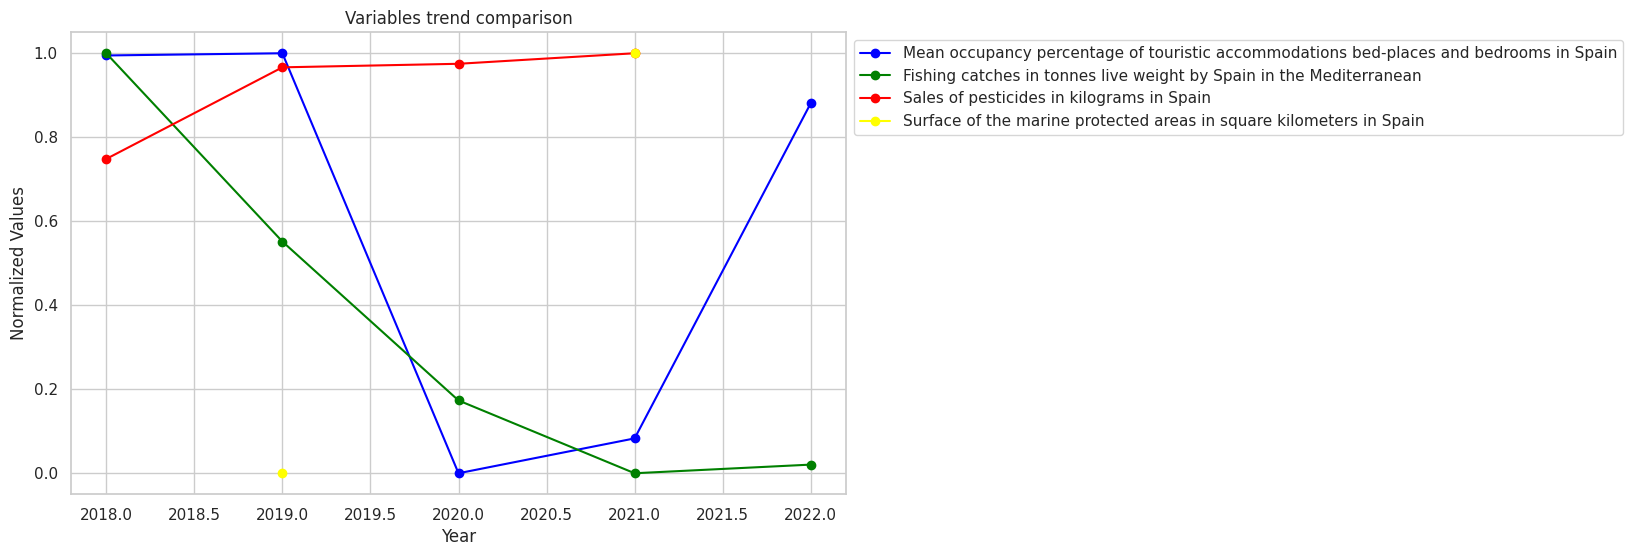

In [ ]:
data = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    'Mean occupancy percentage of touristic accommodations bed-places and bedrooms in Spain': [63.28, 63.43, 35.0, 37.36, 60.05],
    'Fishing catches in tonnes live weight by Spain in the Mediterranean': [1835471.29, 1587028.41, 1377268.76, 1281212.61, 1292619.61],
    'Sales of pesticides in kilograms in Spain': [213244914, 275407126, 277815481, 284965114, 0],
    'Surface of the marine protected areas in square kilometers in Spain': [0, 0, 0, 128682, 0]
}

data = pd.DataFrame(data)

max_value = data['Mean occupancy percentage of touristic accommodations bed-places and bedrooms in Spain'].max()
min_value = data['Mean occupancy percentage of touristic accommodations bed-places and bedrooms in Spain'].min()

data['Mean occupancy percentage of touristic accommodations bed-places and bedrooms in Spain'] = (data['Mean occupancy percentage of touristic accommodations bed-places and bedrooms in Spain'] - min_value) / (max_value - min_value)

max_value = data['Fishing catches in tonnes live weight by Spain in the Mediterranean'].max()
min_value = data['Fishing catches in tonnes live weight by Spain in the Mediterranean'].min()

data['Fishing catches in tonnes live weight by Spain in the Mediterranean'] = (data['Fishing catches in tonnes live weight by Spain in the Mediterranean'] - min_value) / (max_value - min_value)

max_value = data['Sales of pesticides in kilograms in Spain'].max()
min_value = data['Sales of pesticides in kilograms in Spain'].min()

data['Sales of pesticides in kilograms in Spain'] = (data['Sales of pesticides in kilograms in Spain'] - min_value) / (max_value - min_value)

max_value = data['Surface of the marine protected areas in square kilometers in Spain'].max()
min_value = data['Surface of the marine protected areas in square kilometers in Spain'].min()

data['Surface of the marine protected areas in square kilometers in Spain'] = (data['Surface of the marine protected areas in square kilometers in Spain'] - min_value) / (max_value - min_value)


data.loc[data['Year'] == 2022, 'Sales of pesticides in kilograms in Spain'] = np.nan

data.loc[data['Year'] == 2018, 'Surface of the marine protected areas in square kilometers in Spain'] = np.nan

data.loc[data['Year'] == 2020, 'Surface of the marine protected areas in square kilometers in Spain'] = np.nan

data.loc[data['Year'] == 2022, 'Surface of the marine protected areas in square kilometers in Spain'] = np.nan


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

plt.plot(data['Year'], data['Mean occupancy percentage of touristic accommodations bed-places and bedrooms in Spain'], marker='o', label='Mean occupancy percentage of touristic accommodations bed-places and bedrooms in Spain', color='blue')
plt.plot(data['Year'], data['Fishing catches in tonnes live weight by Spain in the Mediterranean'], marker='o', label='Fishing catches in tonnes live weight by Spain in the Mediterranean', color='green')
plt.plot(data['Year'], data['Sales of pesticides in kilograms in Spain'], marker='o', label='Sales of pesticides in kilograms in Spain', color='red')
plt.plot(data['Year'], data['Surface of the marine protected areas in square kilometers in Spain'], marker='o', label='Surface of the marine protected areas in square kilometers in Spain', color='yellow')

plt.title('Variables trend comparison')
plt.xlabel('Year')
plt.ylabel('Normalized Values')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [ ]:
!pip install xarray gcsfs netCDF4

In [5]:
import xarray as xr
from osgeo import gdal
import gcsfs
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [11]:
file_path = '/content/drive/MyDrive/pinki/Elena_data/S3A_OL_2_WFR____20180617T100824_20180617T101124_20180618T171003_0179_032_236_2340_MAR_O_NT_002.SEN3/chl_nn.nc'

In [12]:
ds18 = xr.open_dataset(file_path, engine='h5netcdf', chunks={'time': 1})

In [ ]:
file_path = '/content/drive/MyDrive/pinki/Elena_data/S3A_OL_2_WFR____20180617T100824_20180617T101124_20180618T171003_0179_032_236_2340_MAR_O_NT_002.SEN3/chl_oc4me.nc'

In [ ]:
ds18a = xr.open_dataset(file_path, engine='h5netcdf', chunks={'time': 1})

In [ ]:
coord_file_path = '/content/drive/MyDrive/pinki/Elena_data/S3A_OL_2_WFR____20180617T100824_20180617T101124_20180618T171003_0179_032_236_2340_MAR_O_NT_002.SEN3/geo_coordinates.nc'

In [ ]:
coord_ds = xr.open_dataset(coord_file_path)

In [ ]:
# extracting coordinates
lat = coord_ds.latitude.data
lon = coord_ds.longitude.data

In [ ]:
# assign coordinates to the chl dataset (needs to refer to both the dimensions of our dataset)
ds18 = ds18.assign_coords({"lon":(["rows","columns"], lon), "lat":(["rows","columns"], lat)})

In [ ]:
# clip the image (add your own coordinates)
area_of_interesta = ds18.where((-4 < ds18.lon) & (ds18.lon < 8) & (34 < ds18.lat) & (ds18.lat < 41), drop=True)

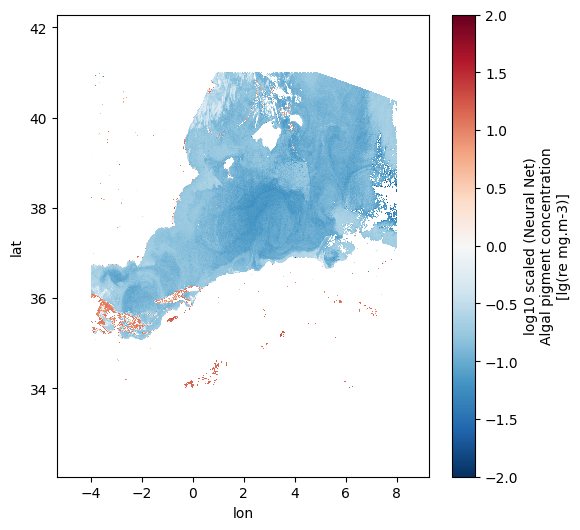

In [ ]:
plt.figure(figsize=(6,6))
area_of_interesta["CHL_NN"].plot(x="lon",y="lat")

In [ ]:
ds18a = ds18a.assign_coords({"lon":(["rows","columns"], lon), "lat":(["rows","columns"], lat)})

In [ ]:
area_of_interestaa = ds18a.where((-4 < ds18a.lon) & (ds18a.lon < 8) & (34 < ds18a.lat) & (ds18a.lat < 41), drop=True)

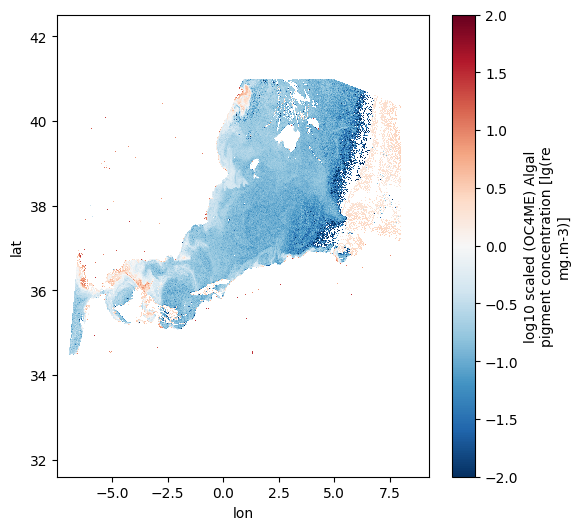

In [ ]:
plt.figure(figsize=(6,6))
area_of_interestaa["CHL_OC4ME"].plot(x="lon",y="lat")

In [ ]:
file_path = '/content/drive/MyDrive/pinki/Elena_data/S3B_OL_2_WFR____20190629T095511_20190629T095811_20190630T184855_0179_027_079_2340_MAR_O_NT_002.SEN3/chl_nn.nc'

In [ ]:
ds19 = xr.open_dataset(file_path, engine='h5netcdf', chunks={'time': 1})

In [ ]:
file_path = '/content/drive/MyDrive/pinki/Elena_data/S3B_OL_2_WFR____20190629T095511_20190629T095811_20190630T184855_0179_027_079_2340_MAR_O_NT_002.SEN3/chl_oc4me.nc'

In [ ]:
ds19a = xr.open_dataset(file_path, engine='h5netcdf', chunks={'time': 1})

In [ ]:
coord_file_path = '/content/drive/MyDrive/pinki/Elena_data/S3B_OL_2_WFR____20190629T095511_20190629T095811_20190630T184855_0179_027_079_2340_MAR_O_NT_002.SEN3/geo_coordinates.nc'

In [ ]:
coord_ds = xr.open_dataset(coord_file_path)

In [ ]:
lat = coord_ds.latitude.data
lon = coord_ds.longitude.data

In [ ]:
ds19 = ds19.assign_coords({"lon":(["rows","columns"], lon), "lat":(["rows","columns"], lat)})

In [ ]:
area_of_interestb = ds19.where((-8 < ds19.lon) & (ds19.lon < 8) & (34 < ds19.lat) & (ds19.lat < 41), drop=True)

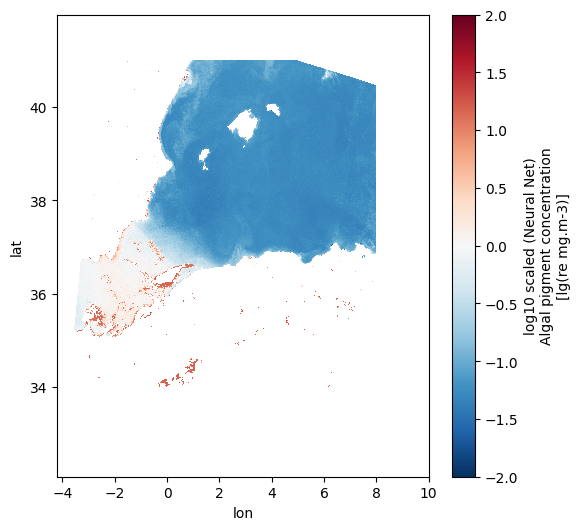

In [ ]:
plt.figure(figsize=(6,6))
area_of_interestb["CHL_NN"].plot(x="lon",y="lat")

In [ ]:
ds19a = ds19a.assign_coords({"lon":(["rows","columns"], lon), "lat":(["rows","columns"], lat)})

In [ ]:
area_of_interestbb = ds19a.where((-4 < ds19a.lon) & (ds19a.lon < 8) & (34 < ds19a.lat) & (ds19a.lat < 41), drop=True)

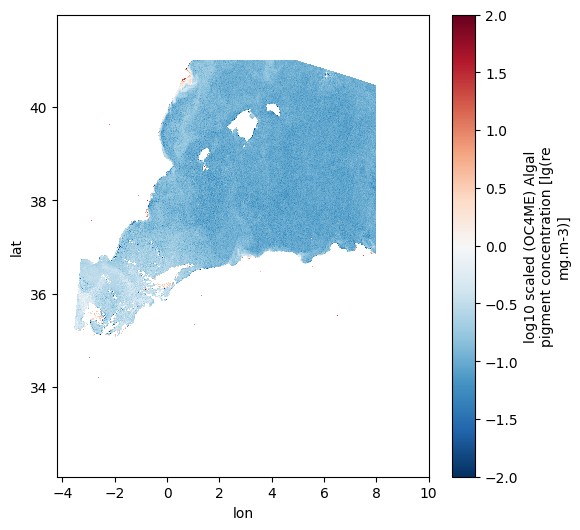

In [ ]:
plt.figure(figsize=(6,6))
area_of_interestbb["CHL_OC4ME"].plot(x="lon",y="lat")

In [ ]:
file_path = '/content/drive/MyDrive/pinki/Elena_data/S3A_OL_2_WFR____20200623T100111_20200623T100411_20200624T164903_0180_059_350_2340_MAR_O_NT_002.SEN3/chl_nn.nc'

In [ ]:
ds20 = xr.open_dataset(file_path, engine='h5netcdf', chunks={'time': 1})

In [ ]:
file_path = '/content/drive/MyDrive/pinki/Elena_data/S3A_OL_2_WFR____20200623T100111_20200623T100411_20200624T164903_0180_059_350_2340_MAR_O_NT_002.SEN3/chl_oc4me.nc'

In [ ]:
ds20a = xr.open_dataset(file_path, engine='h5netcdf', chunks={'time': 1})

In [ ]:
coord_file_path = '/content/drive/MyDrive/pinki/Elena_data/S3A_OL_2_WFR____20200623T100111_20200623T100411_20200624T164903_0180_059_350_2340_MAR_O_NT_002.SEN3/geo_coordinates.nc'

In [ ]:
coord_ds = xr.open_dataset(coord_file_path)

In [ ]:
lat = coord_ds.latitude.data
lon = coord_ds.longitude.data

In [ ]:
ds20 = ds20.assign_coords({"lon":(["rows","columns"], lon), "lat":(["rows","columns"], lat)})

In [ ]:
area_of_interestc = ds20.where((-4 < ds20.lon) & (ds20.lon < 8) & (34 < ds20.lat) & (ds20.lat < 41), drop=True)

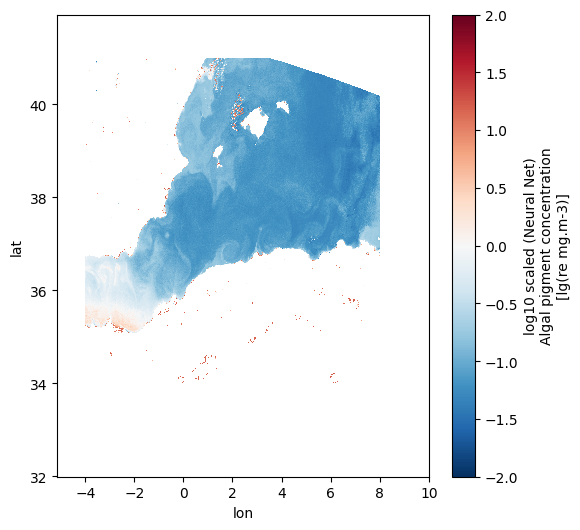

In [ ]:
plt.figure(figsize=(6,6))
area_of_interestc["CHL_NN"].plot(x="lon",y="lat")

In [ ]:
ds20a = ds20a.assign_coords({"lon":(["rows","columns"], lon), "lat":(["rows","columns"], lat)})

In [ ]:
area_of_interestcc = ds20a.where((-4 < ds20a.lon) & (ds20a.lon < 8) & (34 < ds20a.lat) & (ds20a.lat < 41), drop=True)

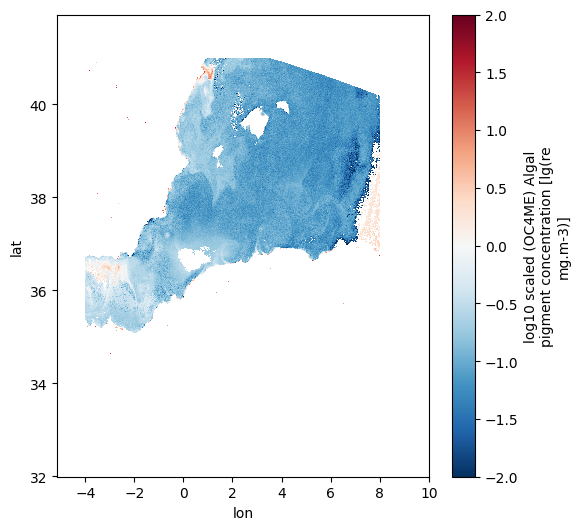

In [ ]:
plt.figure(figsize=(6,6))
area_of_interestcc["CHL_OC4ME"].plot(x="lon",y="lat")

In [ ]:
file_path = '/content/drive/MyDrive/pinki/Elena_data/S3A_OL_2_WFR____20210624T101231_20210624T101531_20210625T231214_0179_073_179_2340_MAR_O_NT_003.SEN3/chl_nn.nc'

In [ ]:
ds21 = xr.open_dataset(file_path, engine='h5netcdf', chunks={'time': 1})

In [ ]:
file_path = '/content/drive/MyDrive/pinki/Elena_data/S3A_OL_2_WFR____20210624T101231_20210624T101531_20210625T231214_0179_073_179_2340_MAR_O_NT_003.SEN3/chl_oc4me.nc'

In [ ]:
ds21a = xr.open_dataset(file_path, engine='h5netcdf', chunks={'time': 1})

In [ ]:
coord_file_path = '/content/drive/MyDrive/pinki/Elena_data/S3A_OL_2_WFR____20210624T101231_20210624T101531_20210625T231214_0179_073_179_2340_MAR_O_NT_003.SEN3/geo_coordinates.nc'

In [ ]:
coord_ds = xr.open_dataset(coord_file_path)

In [ ]:
lat = coord_ds.latitude.data
lon = coord_ds.longitude.data

In [ ]:
ds21 = ds21.assign_coords({"lon":(["rows","columns"], lon), "lat":(["rows","columns"], lat)})

In [ ]:
area_of_interestd = ds21.where((-4 < ds21.lon) & (ds21.lon < 8) & (34 < ds21.lat) & (ds21.lat < 41), drop=True)

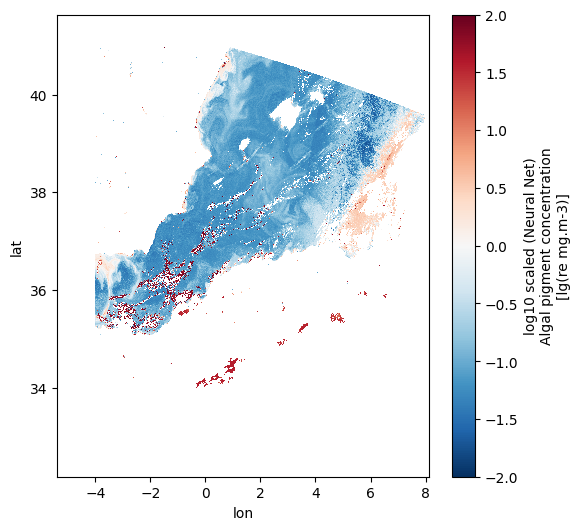

In [ ]:
plt.figure(figsize=(6,6))
area_of_interestd["CHL_NN"].plot(x="lon",y="lat")

In [ ]:
ds21a = ds21a.assign_coords({"lon":(["rows","columns"], lon), "lat":(["rows","columns"], lat)})

In [ ]:
area_of_interestdd = ds21a.where((-4 < ds21a.lon) & (ds21a.lon < 8) & (34 < ds21a.lat) & (ds21a.lat < 41), drop=True)

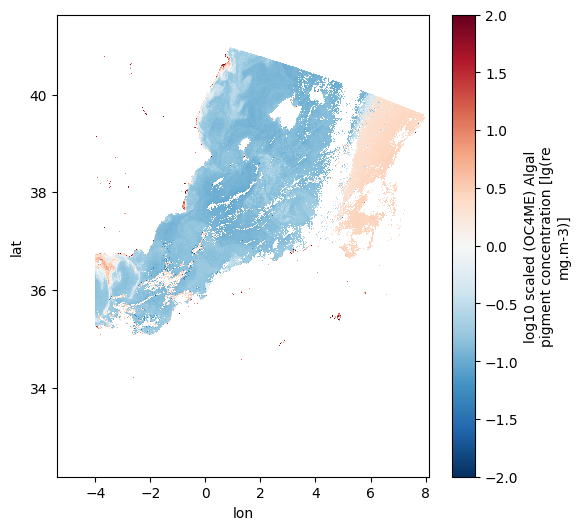

In [ ]:
plt.figure(figsize=(6,6))
area_of_interestdd["CHL_OC4ME"].plot(x="lon",y="lat")

In [ ]:
file_path = '/content/drive/MyDrive/pinki/Elena_data/S3B_OL_2_WFR____20220628T100654_20220628T100954_20220629T224240_0180_067_293_2340_MAR_O_NT_003.SEN3/chl_nn.nc'

In [ ]:
ds22 = xr.open_dataset(file_path, engine='h5netcdf', chunks={'time': 1})

In [ ]:
file_path = '/content/drive/MyDrive/pinki/Elena_data/S3B_OL_2_WFR____20220628T100654_20220628T100954_20220629T224240_0180_067_293_2340_MAR_O_NT_003.SEN3/chl_oc4me.nc'

In [ ]:
ds22a = xr.open_dataset(file_path, engine='h5netcdf', chunks={'time': 1})

In [ ]:
coord_file_path = '/content/drive/MyDrive/pinki/Elena_data/S3B_OL_2_WFR____20220628T100654_20220628T100954_20220629T224240_0180_067_293_2340_MAR_O_NT_003.SEN3/geo_coordinates.nc'

In [ ]:
coord_ds = xr.open_dataset(coord_file_path)

In [ ]:
lat = coord_ds.latitude.data
lon = coord_ds.longitude.data

In [ ]:
ds22 = ds22.assign_coords({"lon":(["rows","columns"], lon), "lat":(["rows","columns"], lat)})

In [ ]:
area_of_intereste = ds22.where((-4 < ds22.lon) & (ds22.lon < 8) & (34 < ds22.lat) & (ds22.lat < 41), drop=True)

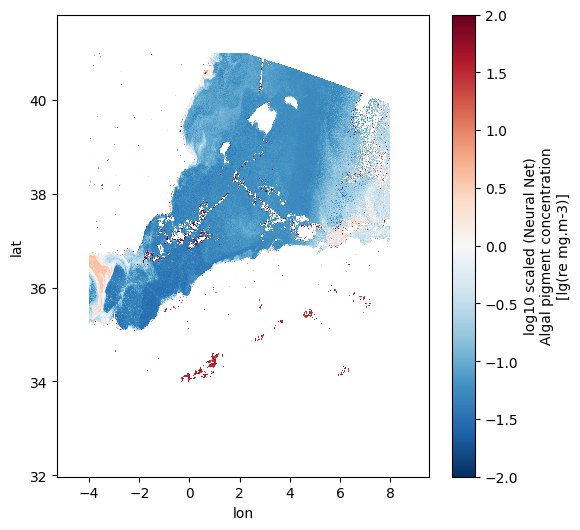

In [ ]:
plt.figure(figsize=(6,6))
area_of_intereste["CHL_NN"].plot(x="lon",y="lat")

In [ ]:
ds22a = ds22a.assign_coords({"lon":(["rows","columns"], lon), "lat":(["rows","columns"], lat)})

In [ ]:
area_of_interestee = ds22a.where((-4 < ds22a.lon) & (ds22a.lon < 8) & (34 < ds22a.lat) & (ds22a.lat < 41), drop=True)

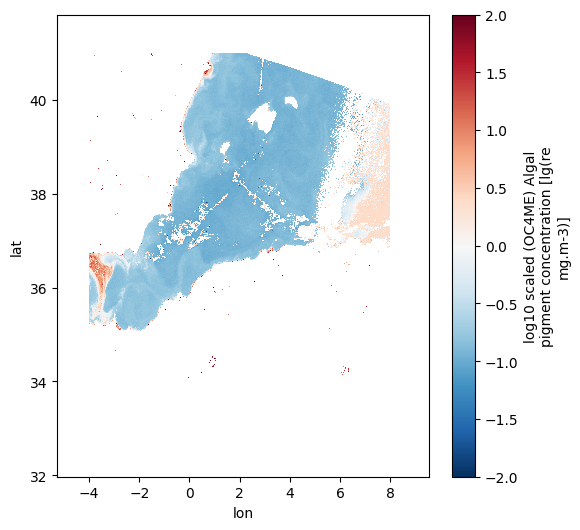

In [ ]:
plt.figure(figsize=(6,6))
area_of_interestee["CHL_OC4ME"].plot(x="lon",y="lat")